"Picture Prediction vha. Cifar10 via keras.io

1) Byg en model baseret ud fra Cifar10's datasæt. (https://keras.io/api/datasets/cifar10/)

2) Find et billede en frø, en bil og et skib og bestem ud fra modellen billedets kategori.

3) Evaluér modellen og plot hvor brugbar (præcis) modellen er."

In [2]:
# Inpoter de forskellige biblioteker
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
# Tjek versionerne af tenserflow og keras hvis de ikke er ens eksekver koden i næste Slide.
print(tf. __version__)
print(keras. __version__)

In [3]:
# Der kommer en fejl ved brug af Jupyter hvis ikke man sørger for at keras og tenserflow køre på samme version.
# Kør koden nederst for at sørge for at de har samme version


# pip install keras==2.7.0 --user

In [4]:
# Hent dataen fra cifar10 og load det ind i de 2 tupler. 
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [5]:
#Her ser vi hvilken typpe data de indeholder.
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [6]:
# Her ser vi formen af de forkellige arrays.
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [7]:
# Neden under ser vi det første billede i cifar10 som et array.
index= 0
x_train[index]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

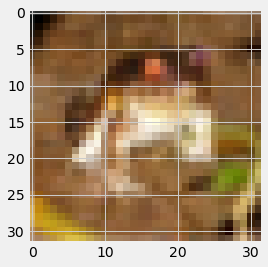

In [8]:
# Her vises billedet. 
img = plt.imshow(x_train[index])

In [9]:
# Billedets label, viser vilken række billedklassen befinder sig i, i cifar10 datasættet.
print('The image label is:',y_train[index] )

The image label is: [6]


In [10]:
# Her sætter vi navene på billedernes klassifikationer. 
classification = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Tjek om billed klassen stemmer over ens.
print('The image class is:', classification[y_train[index][0]])

The image class is: frog


In [11]:
# Her konvaterer vi billedernes labels, til set's som indeholder 10 number som behandles af det neurale netværk senere.
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [12]:
# Her vises hvordan de 10 billeklassers labels ser ud efter de er konvateret til set's
print(y_train_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [13]:
# Her vises det forige billeds lable efter det er konvateret til et set. Der er ni 0'er og en 1'et på plads nr 6. 
print('The one hot lable is:', y_train_one_hot[index])

The one hot lable is: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [14]:
# Her normaliserer jeg pixels til at have en værdi imellem 0 og 1 ved at dividerer det oprindelige x værdi med 255
x_train = x_train / 255
x_test = x_test / 255

In [15]:
# Neden under ser vi det første billede i cifar10 som et array der er normaliseret.
x_train[index]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [16]:
# OPG 1. Byg en model baseret ud fra Cifar10's datasæt. 

# Modellens arkitektstur.
model = Sequential()

# Tilføj det første lag som et foldnings layer 
model.add(Conv2D(32, (5,5), activation='relu', input_shape=(32,32,3)))

# Tilføj et pooling layer
model.add(MaxPooling2D(pool_size = (2,2)))

# Tilføj et ekstra convolution/foldnings layer
model.add(Conv2D(32, (5,5), activation='relu'))

# Tilføj et ekstra pooling layer
model.add(MaxPooling2D(pool_size = (2,2)))

# Tilføj et flattening layer
model.add(Flatten())

# Tilføj et layer med 1000 neurons 
model.add(Dense(1000, activation='relu'))

# Tilføj et drop out layer
model.add(Dropout(0.5))

# Tilføj et layer med 500 neurons 
model.add(Dense(500, activation='relu'))

# ilføj et drop out layer
model.add(Dropout(0.5))

# Tilføj et layer med 250 neurons 
model.add(Dense(250, activation='relu'))

# Tilføj et layer med 10 neurons 
model.add(Dense(10, activation='softmax'))

In [17]:
# Compile modellen
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [20]:
# Træn modellen

hist = model.fit(x_train, y_train_one_hot, batch_size = 256, epochs = 10, validation_split = 0.2)

Epoch 1/10
157/157 [==============================] - 9s 54ms/step - loss: 1.8144 - accuracy: 0.3203 - val_loss: 1.5258 - val_accuracy: 0.4506
Epoch 2/10
157/157 [==============================] - 8s 52ms/step - loss: 1.4319 - accuracy: 0.4724 - val_loss: 1.4117 - val_accuracy: 0.4924
Epoch 3/10
157/157 [==============================] - 8s 52ms/step - loss: 1.3021 - accuracy: 0.5299 - val_loss: 1.2366 - val_accuracy: 0.5644
Epoch 4/10
157/157 [==============================] - 8s 51ms/step - loss: 1.1871 - accuracy: 0.5743 - val_loss: 1.2017 - val_accuracy: 0.5707
Epoch 5/10
157/157 [==============================] - 8s 51ms/step - loss: 1.1062 - accuracy: 0.6069 - val_loss: 1.0729 - val_accuracy: 0.6203
Epoch 6/10
157/157 [==============================] - 8s 52ms/step - loss: 1.0349 - accuracy: 0.6331 - val_loss: 1.0273 - val_accuracy: 0.6349
Epoch 7/10
157/157 [==============================] - 8s 51ms/step - loss: 0.9760 - accuracy: 0.6515 - val_loss: 1.0256 - val_accuracy: 0.6394

In [21]:
# Evaluér modellen og plot hvor brugbar (præcis) modellen er
# Her evalueres modellen ved at bruge test dataen.
model.evaluate(x_test, y_test_one_hot)[1]

313/313 [==============================] - 1s 3ms/step - loss: 0.9349 - accuracy: 0.6772


0.6772000193595886

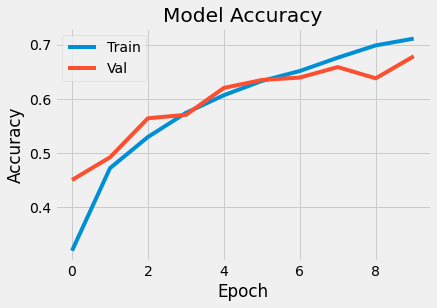

In [22]:
# Her visualiseres modellens nøjagtighed. 
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

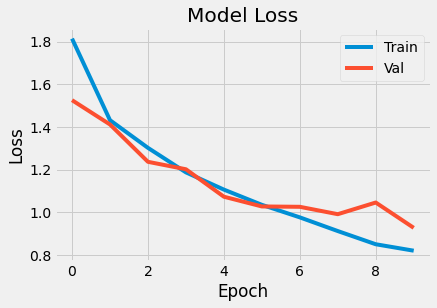

In [23]:
# Her visualiseres modellens tab.
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

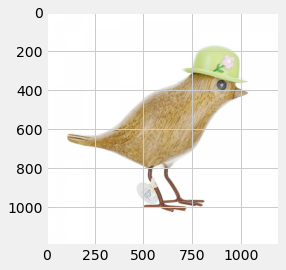

In [33]:
# Her vises et valg billed som jeg selv har fundet og lagt i mappens rodstruktur.
new_image = plt.imread('fugl.jpg')
img = plt.imshow(new_image)


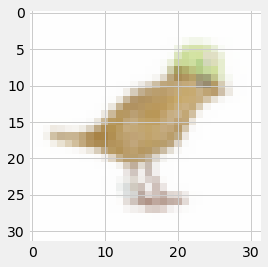

In [25]:
# Det er vigtigt at ændre størelsen på det billede man vælger, så den passer til den ønskede størrelse i cifar10 datasættet.
from skimage.transform import resize
resized_image = resize(new_image, (32,32,3))
img = plt.imshow(resized_image)

In [26]:
# Her vises min models forudsigelser.
predictions = model.predict(np.array([resized_image]))
# Her vises min models forudsigelser i klassifikationen.
predictions

array([[3.27687189e-02, 2.07785051e-05, 7.40834236e-01, 1.38382629e-01,
        1.36611378e-03, 3.17967758e-02, 5.39356917e-02, 1.13464695e-04,
        7.38445728e-04, 4.32257875e-05]], dtype=float32)

In [27]:
# Her sorterer jeg klassifikationerne af cifar10 datasættet så den forusigelse min model tror der er, står øverst.
list_index = [0,1,2,3,4,5,6,7,8,9]
x = predictions

for i in range(10):
  for j in range(10):
    if x[0][list_index[i]] > x[0][list_index[j]]:
      temp = list_index[i]
      list_index[i] = list_index[j]
      list_index[j] = temp

# Her vises de sorterede labels(Det er vist i deres index)
print(list_index)

[2, 3, 6, 0, 5, 4, 8, 7, 9, 1]


In [28]:
# Her vises de første 5 sorterede forudsigelser. 
for i in range(5):
  print(classification[list_index[i]], ':', round(predictions[0][list_index[i]] * 100, 2), '%')

bird : 74.08 %
cat : 13.84 %
frog : 5.39 %
airplane : 3.28 %
dog : 3.18 %
